<a href="https://colab.research.google.com/github/Aryaaa-S/Twitter-Sentiment-Analysis/blob/main/Sentiment_Analysis_Arya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>TWITTER SENTIMENT ANALYSIS</h1></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from spacy.lang.en import English

In [15]:
data_cols=['Target','Id','Date','Flag','User','Text']
data_encoding="ISO-8859-1"

In [21]:
data=pd.read_csv("twitter.csv", encoding=data_encoding ,names=data_cols)
data.head()

,Target,Id,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# New Section

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   Id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [19]:
len(data)

1600000

In [20]:
data['Target'].unique()

array([0, 4])

In [22]:
data['Target']=data['Target'].replace(4,1)

In [23]:
data['Target'].unique()

array([0, 1])

In [24]:
data['Target'].nunique()

2

In [25]:
data.groupby('Target').count()

,Id,Date,Flag,User,Text
Target,,,,,
0,800000,800000,800000,800000,800000
1,800000,800000,800000,800000,800000


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

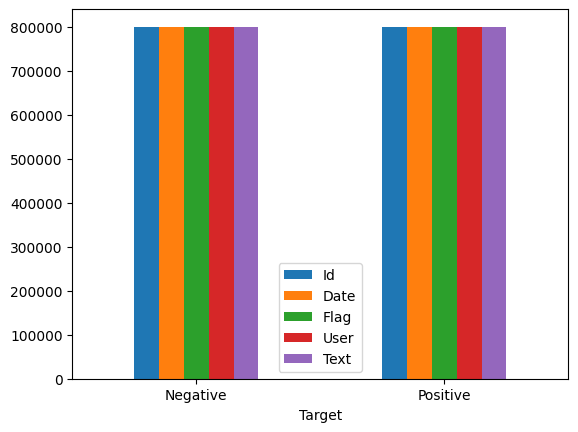

In [26]:
a=data.groupby('Target').count().plot(kind='bar')
a.set_xticklabels(['Negative','Positive'],rotation=0)

<Axes: xlabel='Target', ylabel='count'>

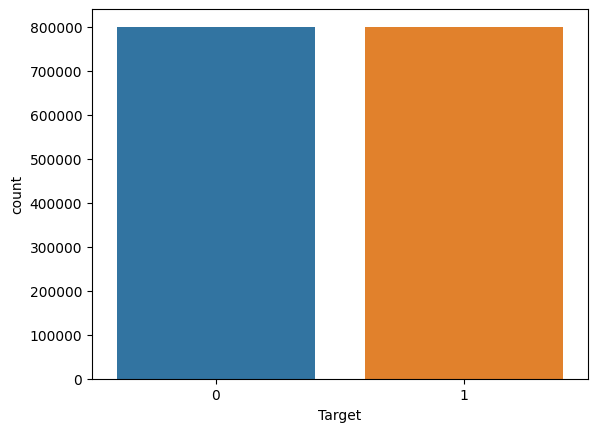

In [27]:
sns.countplot(x='Target',data=data)

<b><h5>Creating functions to check the subjectivity and polarity</h5><br>
-->Subjectivity represents the degree of subjectiveness or objectiveness in the text.The subjectivity score typically ranges from 0 to 1, with 0 being highly objective and 1 being highly subjective.<br>
-->Polarity indicates whether the text conveys a positive, negative, or neutral sentiment. The polarity score usually ranges from -1 to 1, where -1 represents a strongly negative sentiment, 1 represents a strongly positive sentiment, and 0 represents a neutral sentiment.</b>

In [28]:
df=data[['Text','Target']]

In [29]:
df_pos=df[df['Target']==1]
df_neg=df[df['Target']==0]

In [30]:
df_pos=df_pos.head(20000)
df_neg=df_neg.tail(20000)
df=pd.concat([df_pos,df_neg])

In [ ]:
# df_pos=df_pos.iloc[:40000]
# df_neg=df_neg.iloc[:40000]
# df=pd.concat([df_pos,df_neg])

In [31]:
def getSubjectivity(text):
    joined_text = ' '.join(text)  # Join the list of words into a single string
    return TextBlob(joined_text).sentiment.subjectivity

def getPolarity(text):
    joined_text = ' '.join(text)  # Join the list of words into a single string
    return TextBlob(joined_text).sentiment.polarity

df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)
df.head()

,Text,Target,Subjectivity,Polarity
800000,I LOVE @Health4UandPets u guys r the best!!,1,0.0,0.0
800001,im meeting up with one of my besties tonight! ...,1,0.0,0.0
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1,0.0,0.0
800003,Being sick can be really cheap when it hurts t...,1,0.0,0.0
800004,@LovesBrooklyn2 he has that effect on everyone,1,0.0,0.0


In [32]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Text,Target,Subjectivity,Polarity,Analysis
800000,I LOVE @Health4UandPets u guys r the best!!,1,0.0,0.0,Neutral
800001,im meeting up with one of my besties tonight! ...,1,0.0,0.0,Neutral
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1,0.0,0.0,Neutral
800003,Being sick can be really cheap when it hurts t...,1,0.0,0.0,Neutral
800004,@LovesBrooklyn2 he has that effect on everyone,1,0.0,0.0,Neutral


<function matplotlib.pyplot.show(close=None, block=None)>

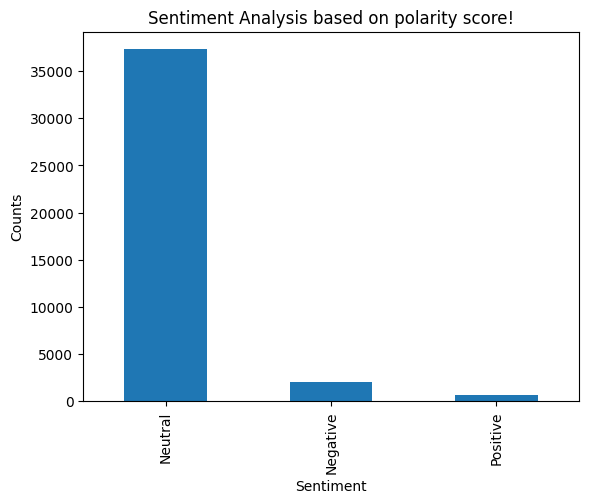

In [33]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis based on polarity score!')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

In [34]:
df.head()

,Text,Target,Subjectivity,Polarity,Analysis
800000,I LOVE @Health4UandPets u guys r the best!!,1,0.0,0.0,Neutral
800001,im meeting up with one of my besties tonight! ...,1,0.0,0.0,Neutral
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1,0.0,0.0,Neutral
800003,Being sick can be really cheap when it hurts t...,1,0.0,0.0,Neutral
800004,@LovesBrooklyn2 he has that effect on everyone,1,0.0,0.0,Neutral


In [35]:
df['Text']=df['Text'].str.lower()
df['Text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: Text, dtype: object

<b><h9>STOPWORDS</h9></b>

In [62]:
#pip install en_core_web_sm

In [36]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [37]:
#removing and cleaning stopwords and repeating characters
STOPWORDS = set(stopwordlist)
def clean_stopwords(Text):
    Text=" ".join([word for word in str(Text).split() if word not in STOPWORDS])
    Text=re.sub(r'(.)\+1',r'\1',Text)
    return Text
df['Text'] = df['Text'].apply(lambda Text: clean_stopwords(Text))
df['Text'].tail()

799995    sick spending day laying bed listening @taylor...
799996                                          gmail down?
799997                               rest peace farrah! sad
799998    @eric_urbane sounds like rival flagging ads. n...
799999    resit exams over summer... wishes worked harde...
Name: Text, dtype: object

In [38]:
#removing and cleaning URLs and numbers
def clean_URLs_num(data):
    if not isinstance(data, (str, bytes)):
        data = str(data)
    data = re.sub(r'((www.[^\s]+)|(https?://[^\s]+))', ' ', data)  # Remove URLs
    data = re.sub(r'[0-9]+', ' ', data)  # Remove numeric digits
    return data

df['Text'] = df['Text'].apply(lambda x: clean_URLs_num(x))
print(df['Text'].tail())


799995    sick spending day laying bed listening @taylor...
799996                                          gmail down?
799997                               rest peace farrah! sad
799998    @eric_urbane sounds like rival flagging ads. n...
799999    resit exams over summer... wishes worked harde...
Name: Text, dtype: object


In [39]:
#Removing patterns like '@'
def remove_pattern(inp, pattern):
    if isinstance(inp,str):
        r = re.findall(pattern, inp)
        for word in r:
            inp=re.sub(word, "", inp)
        return inp
    else:
        return inp
df['Text'] = df['Text'].apply(lambda x: remove_pattern(x, '@'))
df['Text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                          gmail down?
799997                               rest peace farrah! sad
799998    eric_urbane sounds like rival flagging ads. no...
799999    resit exams over summer... wishes worked harde...
Name: Text, dtype: object

In [40]:
#Remove punctuations, numbers and special charachters
df['Text'] = df['Text'].str.replace("[^a-zA-Z#]", " ")
df['Text'].tail()

<ipython-input-40-b0869a94bb2f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace("[^a-zA-Z#]", " ")


799995    sick spending day laying bed listening taylors...
799996                                          gmail down 
799997                               rest peace farrah  sad
799998    eric urbane sounds like rival flagging ads  no...
799999    resit exams over summer    wishes worked harde...
Name: Text, dtype: object

<b><h9>TOKENIZATION</h9><br>
    It  is the process of breaking a document down into words, punctuation marks, numeric digits, etc.<b>

In [41]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Text']=df['Text'].apply(lambda text: tokenizer.tokenize(str(text)))
df['Text'].tail()

799995    [sick, spending, day, laying, bed, listening, ...
799996                                        [gmail, down]
799997                           [rest, peace, farrah, sad]
799998    [eric, urbane, sounds, like, rival, flagging, ...
799999    [resit, exams, over, summer, wishes, worked, h...
Name: Text, dtype: object

<b><h9>STEMMING</h9><br>It  is a process of converting words to their root form.It does so by deleting the suffix and (or) prefix based on predefined rules.</b>

In [42]:
from nltk.stem import PorterStemmer
st=nltk.PorterStemmer()
def stemming_text(data):
    txt=[st.stem(word) for word in data]
    return data
df['Text']=df['Text'].apply(lambda x: stemming_text(x))
df['Text'].tail()

799995    [sick, spending, day, laying, bed, listening, ...
799996                                        [gmail, down]
799997                           [rest, peace, farrah, sad]
799998    [eric, urbane, sounds, like, rival, flagging, ...
799999    [resit, exams, over, summer, wishes, worked, h...
Name: Text, dtype: object

<b><h9>LEMMATIZATION</h9><br>It is the process of finding the form of the related word in the dictionary. It does not simply chop off inflections. Instead, it uses lexical knowledge bases to get the correct base forms of words.</b>

In [43]:
# from nltk.stem import WordNetLemmatizer
# lm=nltk.WordNetLemmatizer()
# def lemmatizing_text(data):
#     txt=[lm.lemmatize(word) for word in data]
#     return data
# df['Text']=df['Text'].apply(lambda x: lemmatizing_text(x))
# df['Text'].tail()

In [44]:
nlp=spacy.load('en_core_web_sm')
def lemmatizing_text(data):
    text = ' '.join(data)
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas
df['Text'] = df['Text'].apply(lambda x: lemmatizing_text(x))
print(df['Text'].tail())


799995    [sick, spending, day, lay, bed, listen, taylor...
799996                                        [gmail, down]
799997                           [rest, peace, farrah, sad]
799998    [eric, urbane, sound, like, rival, flag, ad, n...
799999    [resit, exam, over, summer, wish, work, hard, ...
Name: Text, dtype: object


<b>BAG OF WORDS</b>

In [46]:
bag_of_words = Counter()
for tweet in df.Text:
    bag_of_words.update(tweet)

In [47]:
print('word & count')
print('-'*15)
for i, (key, value) in enumerate(bag_of_words.items()):
    if i >= 15:
        break
    print(key,'=', value)

word & count
---------------
love = 1645
health = 30
uandpet = 2
u = 1186
guy = 457
r = 289
good = 2731
I = 7126
m = 4477
meet = 256
one = 1523
bestie = 25
tonight = 586
can = 1775
not = 4319


<b>WORDCLOUD</b>

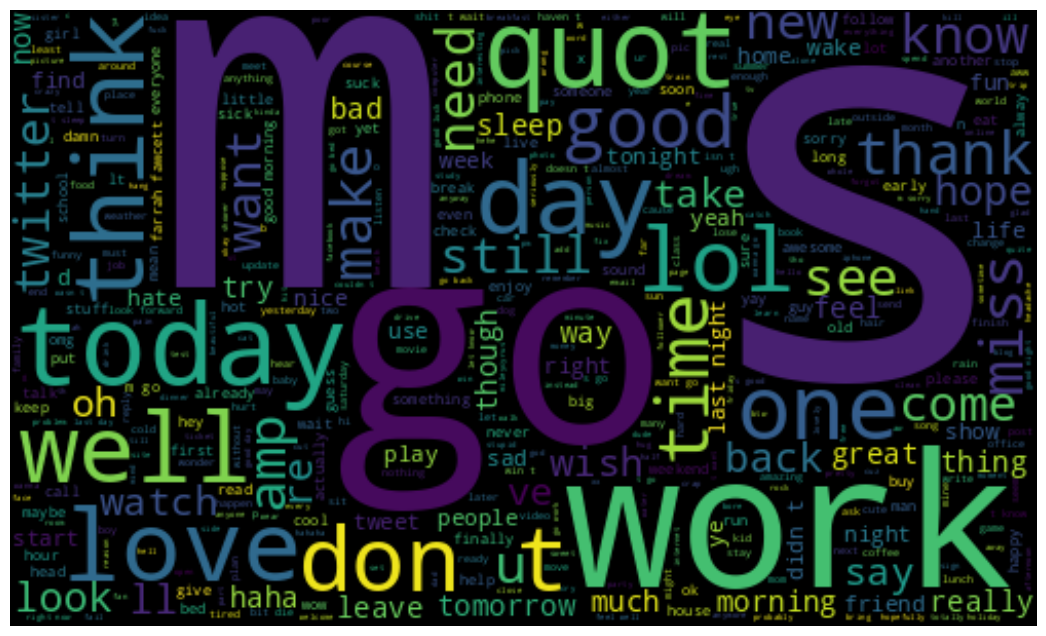

In [61]:
allWords=' '.join([twts for twts in df['Text'].apply(lambda x: ' '.join(x))])
plt.figure(figsize=(15, 8))
wc = WordCloud(max_words=1000, width=500, height=300, random_state=42).generate(allWords)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<b>MODEL BUILDING</b>

In [49]:
X=df['Text']
Y=df['Target']

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [51]:
tfidf=TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=1000, stop_words='english')

In [52]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
lowercase_list = [' '.join(words).lower() for words in df['Text']]
vectoriser.fit(lowercase_list)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [53]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
X_train_lower = [' '.join(words).lower() for words in X_train]
X_test_lower = [' '.join(words).lower() for words in X_test]

X_train = vectoriser.fit_transform(X_train_lower)
X_test = vectoriser.transform(X_test_lower)


In [54]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred=LR.predict(X_test)
LR.score(X_test,Y_test)

0.7747

In [55]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      5190
           1       0.75      0.79      0.77      4810

    accuracy                           0.77     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [57]:
#RANDOM FOREST
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)
print('Random forest accuracy: ',accuracy_score(y_pred, Y_test))

Random forest accuracy:  0.7747
